In [ ]:
# font, display setting

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 워드클라우드 생성 전 전처리

In [ ]:
line_cnt = 0
header = []
reviews = []

with open("drive/Shareddrives/KU 데이터톤/KLUE 크롤링/최종 텍스트 데이터 전처리/klue_khaiii.csv") as f:
    while 1:
        data = f.readline()
        if not data: break
        if line_cnt==0:
            header = data.split(",")
        else:
            reviews.append(data.split(","))
        line_cnt += 1

In [ ]:
import re

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', str(text))
    return(result)

In [ ]:
corpus = []
for w in reviews:
    corpus.append(text_cleaning(w))

In [ ]:
corpus[:3]

[]

## 강의평 길이 순 배열

In [ ]:
import pandas as pd
klue = pd.read_csv('/content/drive/Shareddrives/KU 데이터톤/KLUE 크롤링/tagged2.csv')

In [ ]:
l = {}
for i in range(len(klue)):
    l[i] = len(klue['preprocessed'][i])

In [ ]:
import operator

l_sort = sorted(l.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
l_sort[:10]

[(79, 7467),
 (5, 7322),
 (201, 6907),
 (59, 6771),
 (94, 6366),
 (132, 5486),
 (74, 5166),
 (31, 4887),
 (171, 4846),
 (202, 4632)]

## 워드 클라우드

In [ ]:
stp = {'하다', '같다', '있다','보다','주다','배우다','되다','없다','듣다','받다','이쁘다','대하다','교수','학점','강의','내용','시험','공부', '수업','과목','학생'}

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquare_acR.ttf', stopwords=stp,
               background_color='white', colormap = 'Accent_r', 
               width=800, height=800)

In [ ]:
def lecture_wc(num):
    wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquare_acR.ttf', stopwords=stp,
               background_color='white', colormap = 'Accent_r', 
               width=800, height=800)
    
    wc.generate(corpus[num])

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

    print(klue['class_name'][num]," | ", klue['professor_name'][num])

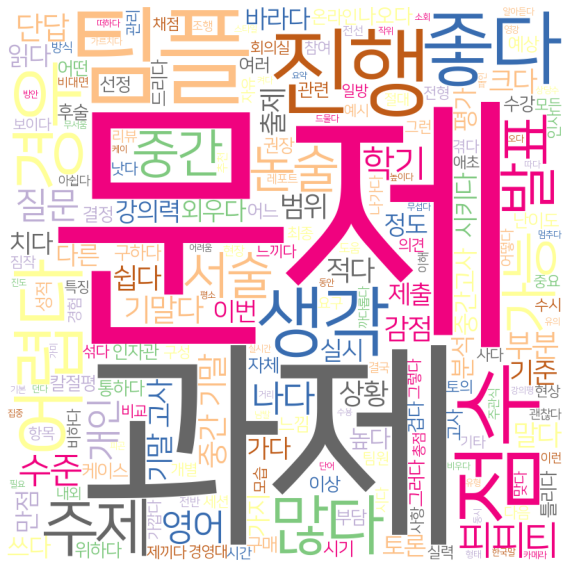

인적자원관리(영강)  |  김광현


In [ ]:
lecture_wc(79)

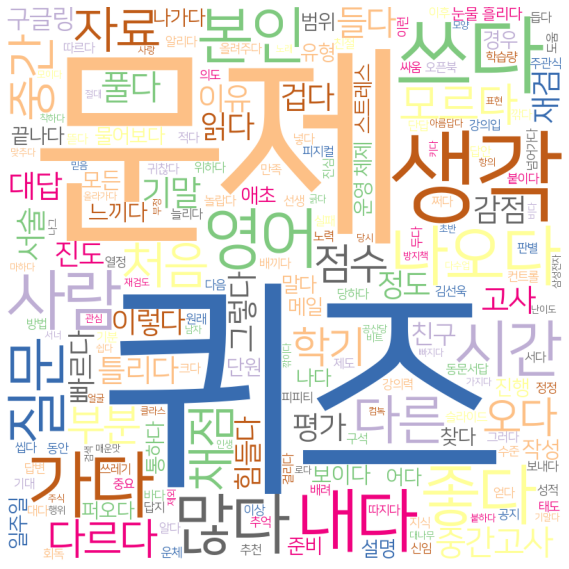

운영체제(영강)  |  곽진태


In [ ]:
lecture_wc(5)

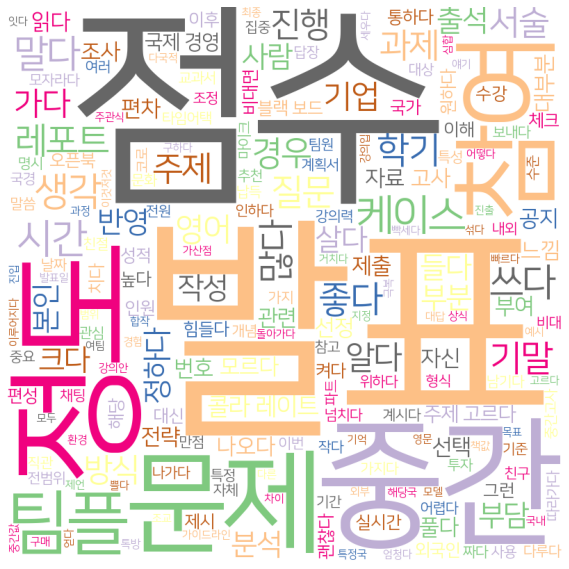

국제경영론(영강)  |  문정빈


In [ ]:
lecture_wc(201)

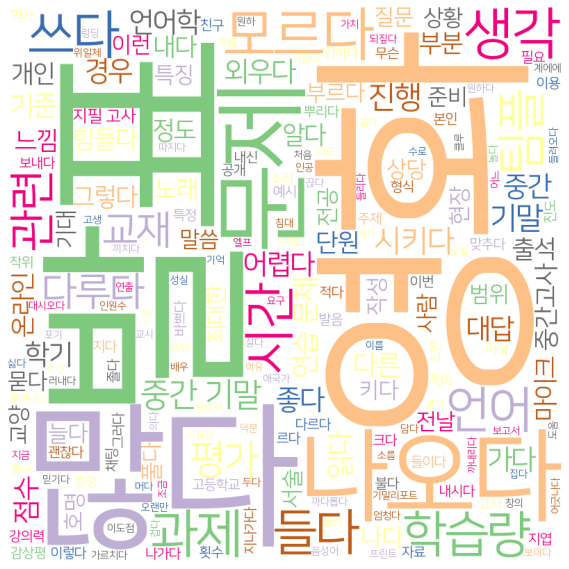

영화와언어  |  강범모


In [ ]:
lecture_wc(59)

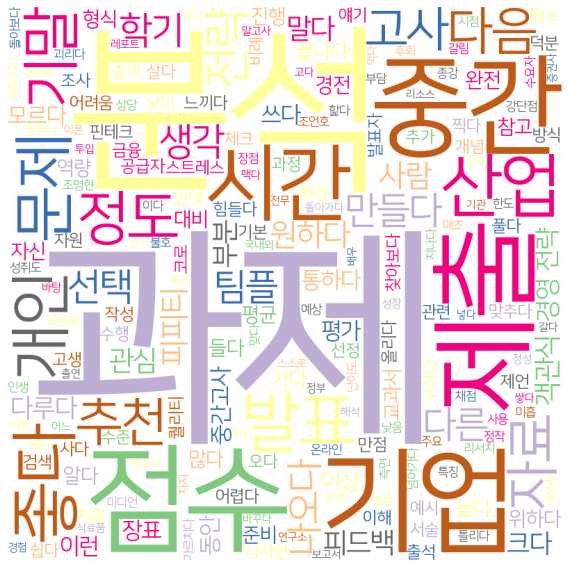

경영전략(3,4학년만 수강)  |  조명현


In [ ]:
lecture_wc(94)

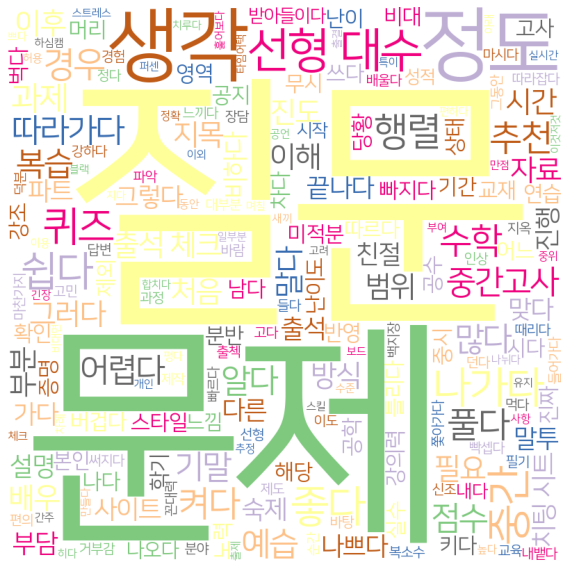

공학수학Ⅱ  |  김창수


In [ ]:
lecture_wc(132)

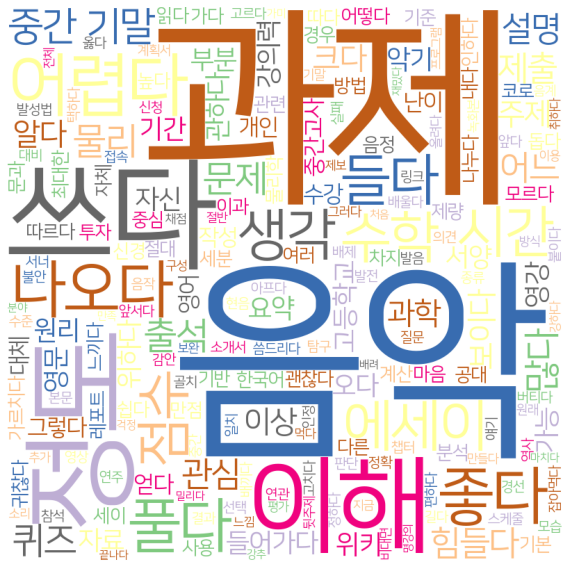

서양음악의과학적이해(영강)  |  정재호


In [ ]:
lecture_wc(74)

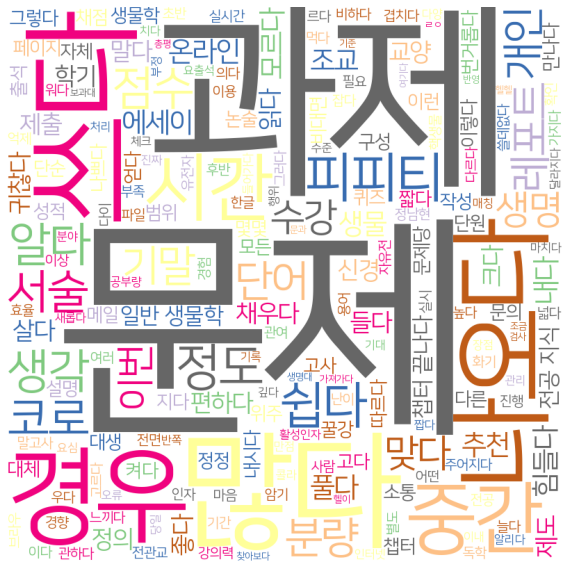

생활속의생물학  |  정남현


In [ ]:
lecture_wc(31)

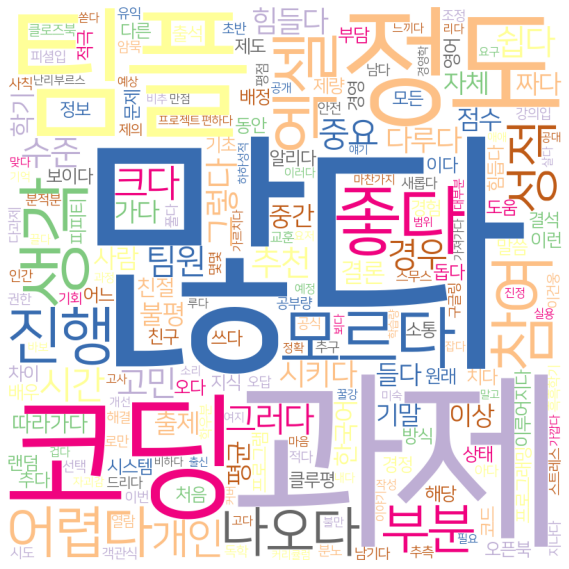

경영정보시스템(영강)  |  이건웅


In [ ]:
lecture_wc(171)